<a href="https://colab.research.google.com/github/pankajchandra24/CaseStudy03pmi/blob/main/CaseStudy_PMI_Pankaj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing Libraries** 

In [425]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import csv
import matplotlib.pyplot as plt
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

## **Loading Granular Sales Data**

In [426]:
dir = r"/content/drive/MyDrive/Colab Notebooks/"

In [427]:
sales = dir + r"/sales_granular.csv"
sales_csv = open(sales)
sales_read = csv.reader(sales_csv, delimiter=',')

In [428]:
ds = pd.read_csv(sales)

In [429]:
#Granular sales Dataset
ds 

,store_code,8/3/15 9:00,8/3/15 10:00,8/3/15 11:00,8/3/15 12:00,8/3/15 13:00,8/3/15 14:00,8/3/15 15:00,8/3/15 16:00,8/3/15 17:00,8/3/15 18:00,8/3/15 19:00,8/3/15 22:00,8/4/15 8:00,8/4/15 9:00,8/4/15 10:00,8/4/15 11:00,8/4/15 12:00,8/4/15 13:00,8/4/15 14:00,8/4/15 15:00,8/4/15 16:00,8/4/15 17:00,8/4/15 18:00,8/4/15 19:00,8/4/15 20:00,8/5/15 7:00,8/5/15 9:00,8/5/15 10:00,8/5/15 11:00,8/5/15 12:00,8/5/15 13:00,8/5/15 14:00,8/5/15 15:00,8/5/15 16:00,8/5/15 17:00,8/5/15 18:00,8/5/15 19:00,8/5/15 20:00,8/6/15 9:00,...,6/23/17 21:00,6/23/17 22:00,6/23/17 23:00,6/24/17 0:00,6/24/17 5:00,6/24/17 6:00,6/24/17 7:00,6/24/17 8:00,6/24/17 9:00,6/24/17 10:00,6/24/17 11:00,6/24/17 12:00,6/24/17 13:00,6/24/17 14:00,6/24/17 15:00,6/24/17 16:00,6/24/17 17:00,6/24/17 18:00,6/24/17 19:00,6/24/17 20:00,6/24/17 21:00,6/24/17 22:00,6/24/17 23:00,6/25/17 6:00,6/25/17 7:00,6/25/17 8:00,6/25/17 9:00,6/25/17 10:00,6/25/17 11:00,6/25/17 12:00,6/25/17 13:00,6/25/17 14:00,6/25/17 15:00,6/25/17 16:00,6/25/17 17:00,6/25/17 18:00,6/25/17 19:00,6/25/17 20:00,6/25/17 21:00,6/25/17 22:00
0,10055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,30.0,NaN,360.0,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0,120.0,NaN,30.0,NaN,NaN,300.0,NaN,60.0,NaN,90.0,330.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.0,60.0,NaN,NaN,NaN,30.0,60.0,150.0,600.0,NaN,NaN,NaN
4,10085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,84223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,NaN,30.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
902,84351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
903,84608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0,360.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [430]:
#Column Names
ds.columns

Index(['store_code', '8/3/15 9:00', '8/3/15 10:00', '8/3/15 11:00',
       '8/3/15 12:00', '8/3/15 13:00', '8/3/15 14:00', '8/3/15 15:00',
       '8/3/15 16:00', '8/3/15 17:00',
       ...
       '6/25/17 13:00', '6/25/17 14:00', '6/25/17 15:00', '6/25/17 16:00',
       '6/25/17 17:00', '6/25/17 18:00', '6/25/17 19:00', '6/25/17 20:00',
       '6/25/17 21:00', '6/25/17 22:00'],
      dtype='object', length=11937)

In [431]:
#to make a list of all the time stamps
iter = next(sales_read)
iter1 = [k.split()[-1] for k in iter]
iter = list(set(iter1))
iter.remove('store_code')

In [432]:
#Each hour vs all the store code mentioned
a = {}
for t in iter:
    a[t] = [index for index, value in enumerate(iter1) if value == t]

In [433]:
#Adding the total sales data per hour against the store code in a dictionary
sales_dict = {}
for row in sales_read:
    store_code = int(row[0])
    total_sales_vol = {}
    for t in a:
        total = 0
        for index in a[t]:
            if not row[index] == "":
                total += eval(row[index])
        total_sales_vol[t] = total

    sales_dict[store_code] = total_sales_vol

### **Loading Surrounding Amenities Data and merging it with Sales Data**

In [434]:
surroundings = dir + r"/Surroundings.json"
surroundings_json = open(surroundings)
dj = pd.read_json(surroundings_json)
m=[]
for index, row in dj.iterrows():
    store_code = row["store_code"]
    surrounding = row["surroundings"]
    if store_code in sales_dict.keys():
        sd = sales_dict[store_code]
        for t in sd:
            p = {}
            p["store_code"] = store_code
            for key, value in row["surroundings"].items():
                p[key] = len(value)
            p["time"] = eval(t.split(":")[0])
            p["total_sale"] = sd[t]
            m.append(p)

## **Resulting Data Frame**

In [435]:
df = pd.DataFrame(m)
df #Data Frame contains information of all the amenities around the store and store sales per time stamp

,store_code,subway_station,department_store,embassy,beauty_salon,police,courthouse,cemetery,pharmacy,local_government_office,shopping_mall,city_hall,rv_park,shoe_store,bank,bowling_alley,bar,university,car_dealer,movie_theater,taxi_stand,jewelry_store,church,convenience_store,campground,lawyer,parking,post_office,hindu_temple,hardware_store,meal_takeaway,movie_rental,gas_station,funeral_home,aquarium,restaurant,home_goods_store,casino,veterinary_care,airport,...,store,hair_care,transit_station,meal_delivery,gym,park,dentist,library,book_store,painter,roofing_contractor,moving_company,clothing_store,furniture_store,physiotherapist,atm,art_gallery,car_wash,locksmith,spa,accounting,cafe,car_repair,synagogue,real_estate_agency,electronics_store,doctor,bicycle_store,storage,zoo,train_station,fire_station,laundry,insurance_agency,plumber,pet_store,bakery,travel_agency,time,total_sale
0,10055,0,0,0,4,0,0,0,3,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,1,1,0,2,0,0,4,0,0,17,7,0,1,0,...,31,6,2,0,3,0,3,0,0,2,0,1,3,6,6,1,1,0,0,1,3,6,2,0,7,4,20,1,1,0,0,0,1,2,0,0,3,1,5,0
1,10055,0,0,0,4,0,0,0,3,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,1,1,0,2,0,0,4,0,0,17,7,0,1,0,...,31,6,2,0,3,0,3,0,0,2,0,1,3,6,6,1,1,0,0,1,3,6,2,0,7,4,20,1,1,0,0,0,1,2,0,0,3,1,10,2100
2,10055,0,0,0,4,0,0,0,3,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,1,1,0,2,0,0,4,0,0,17,7,0,1,0,...,31,6,2,0,3,0,3,0,0,2,0,1,3,6,6,1,1,0,0,1,3,6,2,0,7,4,20,1,1,0,0,0,1,2,0,0,3,1,11,6450
3,10055,0,0,0,4,0,0,0,3,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,1,1,0,2,0,0,4,0,0,17,7,0,1,0,...,31,6,2,0,3,0,3,0,0,2,0,1,3,6,6,1,1,0,0,1,3,6,2,0,7,4,20,1,1,0,0,0,1,2,0,0,3,1,21,0
4,10055,0,0,0,4,0,0,0,3,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,1,1,0,2,0,0,4,0,0,17,7,0,1,0,...,31,6,2,0,3,0,3,0,0,2,0,1,3,6,6,1,1,0,0,1,3,6,2,0,7,4,20,1,1,0,0,0,1,2,0,0,3,1,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12955,47724,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,1350
12956,47724,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
12957,47724,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,2220
12958,47724,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,810


## **Data Cleaning**

In [436]:
#checking if there are NANs
df.isnull().values.any()

False

In [437]:
#checking if df contains negative values
any(df<0)

True

In [438]:
#Negative values replaced by Zero
df[df < 0] = 0

In [439]:
#No Duplicates found
df.duplicated().any

<bound method NDFrame._add_numeric_operations.<locals>.any of 0        False
1        False
2        False
3        False
4        False
         ...  
12955    False
12956    False
12957    False
12958    False
12959    False
Length: 12960, dtype: bool>

In [440]:
#Dropping the columns which has zero standard deviation
df1 = df.drop(df.std()[(df.std() == 0)].index, axis=1)
#Hindu_Temple and rv_park columns were removed

## **Exploratory Data Analysis**

In [441]:
#X is independent variables and y is dependent variable
X=df1.drop(columns=['total_sale','store_code'])
y=df1['total_sale']

In [442]:
#Almost all independent variables have right skewed distribution, so Yeo-Johnson Power Transform is utilized
from sklearn.preprocessing import power_transform
X1 = power_transform(X)

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


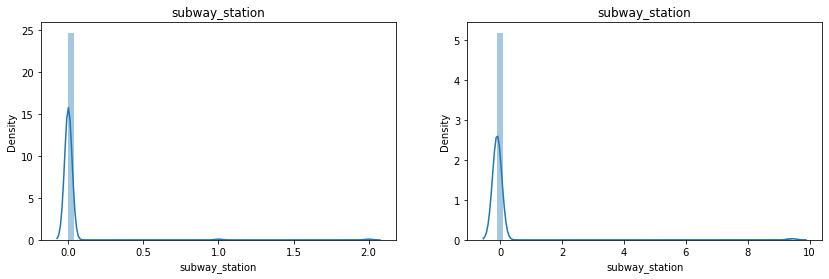

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


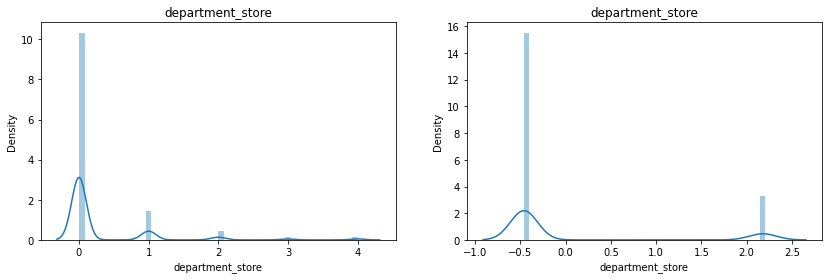

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


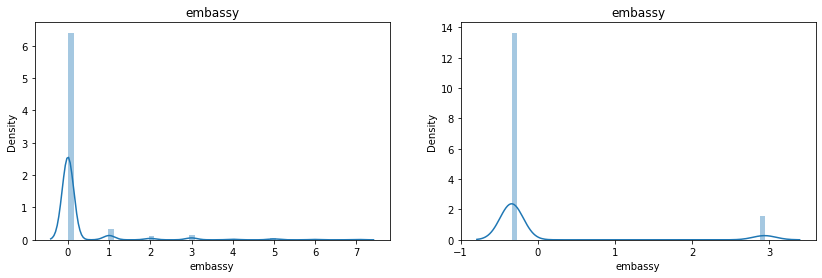

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


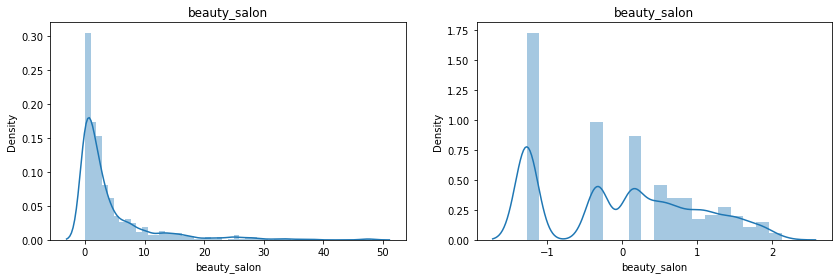

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


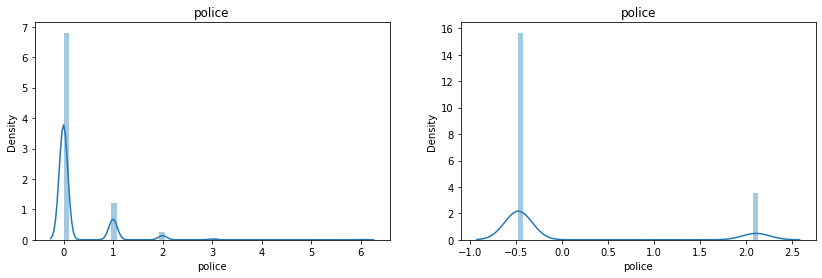

In [458]:
X2 = pd.DataFrame(X1, columns=X.columns)
#Plotting Before and after transformation of the independent variables
for col in X2.columns[0:5]:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(X2[col], kde=True)
    plt.title(col)

    plt.show()

In [459]:
#Target variable is being analysed here
y1 = pd.DataFrame(y)
y1.describe(percentiles = [0.25,0.50,0.75,1])

,total_sale
count,12960.000000
mean,843.291667
std,3711.704175
min,0.000000
25%,0.000000
50%,0.000000
75%,390.000000
100%,78180.000000
max,78180.000000


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


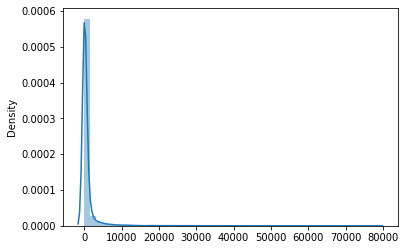

In [479]:
#Plotting Target variable
sns.distplot(y1)

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


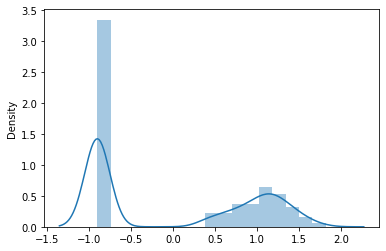

In [461]:
#Using Yeo-Johnson Power Transform on Target Variable
y2 = power_transform(y1)
#plt.plot(y2)
sns.distplot(y2,kde=True)

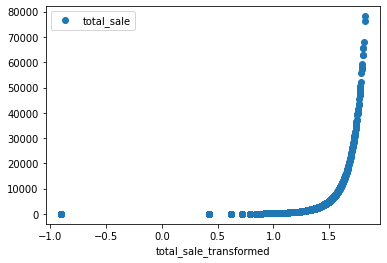

In [462]:
#Looking into how old sales values varies against new transformed sales values
y2 = pd.DataFrame(y2)
y2 = y2.rename(columns={0: "total_sale_transformed"})
yt = pd.concat([y1,y2], axis =1)
yt.plot(x = 'total_sale_transformed', y = 'total_sale', style='o')

In [463]:
#Two bins are formed in the target variable
bin_labels = ['B1', 'B2']
cut_bins = [-1, 0.25, 2]
y3 = pd.cut(y2['total_sale_transformed'],
                              bins= cut_bins,
                              labels=bin_labels, right = False, include_lowest=True)
y3 = pd.DataFrame(y3)

#Encoding the bins B1 and B2 
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
y3['total_sale_transformed']= label_encoder.fit_transform(y3['total_sale_transformed'])
#Making Y3 into an Array because this value we have to give when test-train split is done
y4 = y3.values.flatten() 

<function matplotlib.pyplot.show>

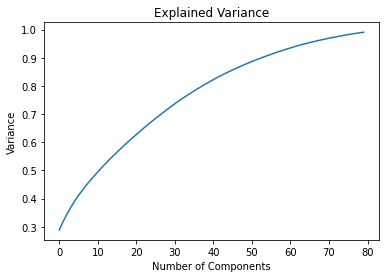

In [464]:
#Principal Component Analysis to see how many components needed to explain the variance in the data
pca=PCA(0.99)
PrincipalComponents =pca.fit_transform(X1)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance')
plt.title('Explained Variance')
plt.show

In [465]:
#Variance Inflation Factor Study to eliminate highly correlated features
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

def calc_vif(x):
    thresh = 5 # All the features with values of VIF above is removed from dataframe
    output = pd.DataFrame()
    k = x.shape[1]
    output = x
    
    for i in range(1, k):
        #print("Iteration No.", i)
        vif = [variance_inflation_factor(output.values, i) for i in range(output.shape[1])]        
        
        vif_data = pd.DataFrame()
        vif_data["feature"] = output.columns

        vif_data["VIF"] = vif   
        #print(vif_data.head(len(output.columns)))
        
        a = np.argmax(vif)
        print ("Max VIF {} is for variable '{}'".format(vif[a], output.columns[a]))
        if (vif[a] < thresh):
            break

        output = output.drop(output.columns[a], axis=1)
        #print("")
        #print("")
    return output

features = calc_vif(X)

Max VIF 51.44447973615045 is for variable 'transit_station'
Max VIF 38.094028974363816 is for variable 'restaurant'
Max VIF 32.78059883988793 is for variable 'hair_care'
Max VIF 27.83757538407041 is for variable 'clothing_store'
Max VIF 24.833501732306694 is for variable 'home_goods_store'
Max VIF 19.871397334205096 is for variable 'shoe_store'
Max VIF 18.59354683852432 is for variable 'beauty_salon'
Max VIF 18.00656182029362 is for variable 'cafe'
Max VIF 17.21763338305937 is for variable 'dentist'
Max VIF 16.572239406363096 is for variable 'bar'
Max VIF 15.436114608702512 is for variable 'store'
Max VIF 13.649617314477997 is for variable 'lawyer'
Max VIF 12.09225104391343 is for variable 'doctor'
Max VIF 11.2948304153998 is for variable 'travel_agency'
Max VIF 8.53863752031225 is for variable 'real_estate_agency'
Max VIF 7.706217536753173 is for variable 'pharmacy'
Max VIF 7.119245322039942 is for variable 'bakery'
Max VIF 6.961643969668077 is for variable 'atm'
Max VIF 6.54438322340

## **Model Building and Testing**

In [466]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(features, y4, test_size=0.3, random_state=7)

In [467]:
#XGBOOST Classifier Training and Predictions
xgb = XGBClassifier(random_state=654)
xgb.fit(X_train, y_train)
xgbpred = xgb.predict(X_test)

In [468]:
#Prediction Results
print(confusion_matrix(y_test,xgbpred))
print("Accuracy Score {}".format(accuracy_score(y_test,xgbpred)))
print(classification_report(y_test,xgbpred))

[[1807  305]
 [ 161 1615]]
Accuracy Score 0.8801440329218106
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      2112
           1       0.84      0.91      0.87      1776

    accuracy                           0.88      3888
   macro avg       0.88      0.88      0.88      3888
weighted avg       0.88      0.88      0.88      3888



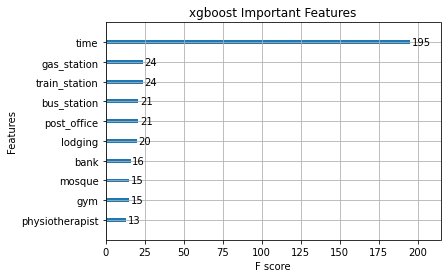

In [469]:
#Feature Importance
xgboost.plot_importance(xgb,max_num_features=10)
plt.title('xgboost Important Features')
plt.show()

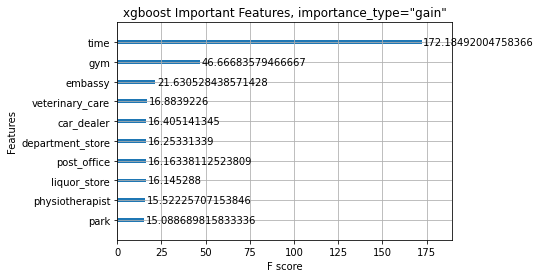

In [470]:
#XGBoost important features with importance type 'gain'
xgboost.plot_importance(xgb, importance_type="gain", max_num_features=10)
plt.title('xgboost Important Features, importance_type="gain"')
plt.show()

## **Explainability of the Model using SHAP values**

In [480]:
!pip install shap

In [481]:
import shap

In [482]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer(X_test)

**Global Feature Imporance using mean shap values with Bar Plot**


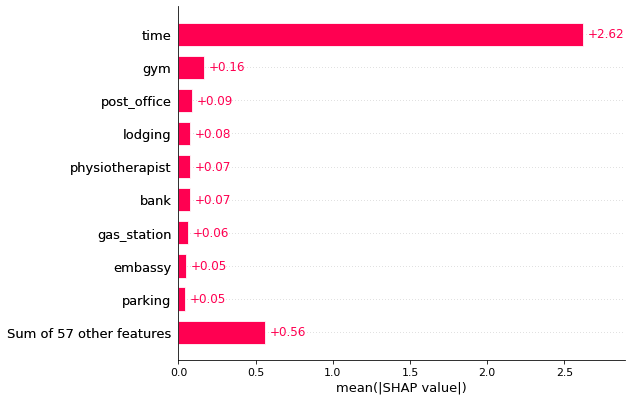

In [483]:
shap.plots.bar(shap_values)

**Global Feature Importance using shap values on beeswarm**

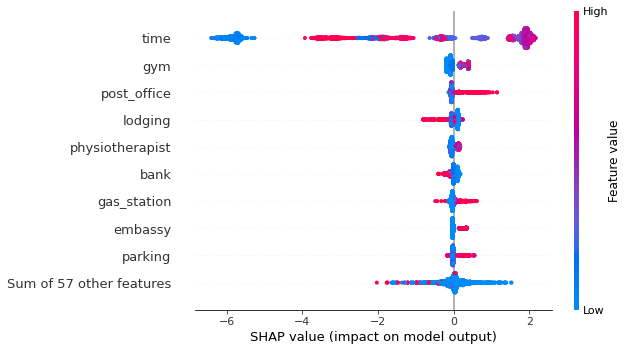

In [484]:
shap.plots.beeswarm(shap_values)

**Local Model Agnostic**

In [485]:
y_test1 = pd.DataFrame(y_test, columns = ['y_test'])
y_pred = pd.DataFrame(xgbpred, columns = ['y_pred'])
dlm = pd.concat([y_test1, y_pred], axis = 1)
dlm.head(15)

,y_test,y_pred
0,1,1
1,1,1
2,0,0
3,1,1
4,0,1
5,0,0
6,0,0
7,0,0
8,1,1
9,0,0


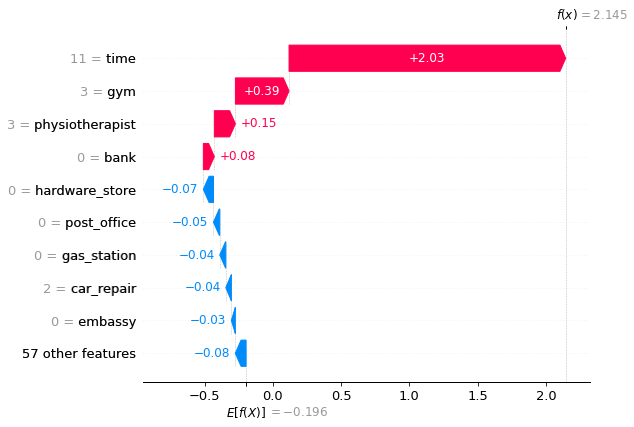

In [486]:
shap.plots.waterfall(shap_values[3]) #Fourth Sample in the test set #High Sale Bracket #Correctly Predicted

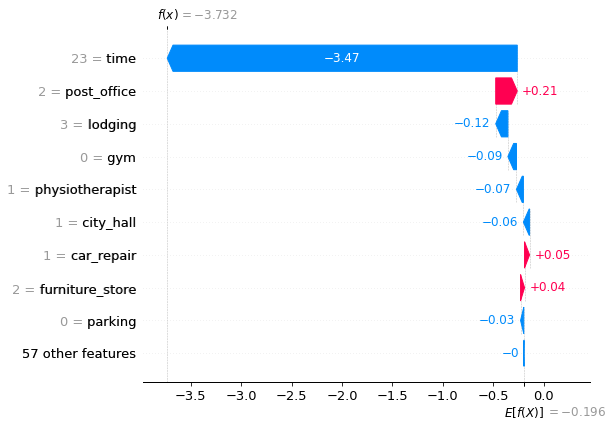

In [487]:
shap.plots.waterfall(shap_values[5]) #Nineth Sample in the test set #Low Sale Bracket #Correctly Predicted